#  Task 1: Student Score Prediction

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [112]:
data = pd.read_csv("C:\\Users\\Abdel\\PycharmProjects\\Student Score Prediction\\StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [113]:
data.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [114]:
# data.data.drop_duplicates()
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Outlier check for {col}")
    plt.show()

ModuleNotFoundError: No module named 'matplotlib_inline'

In [116]:
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

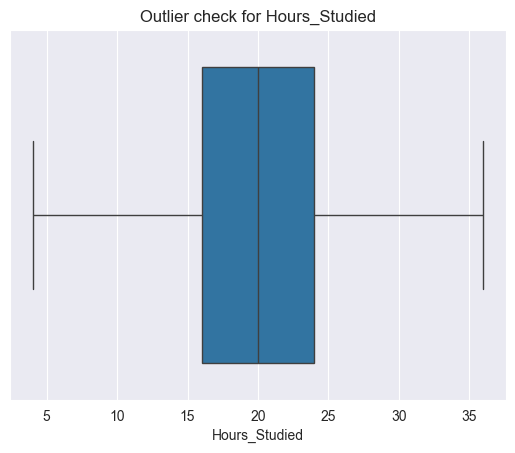

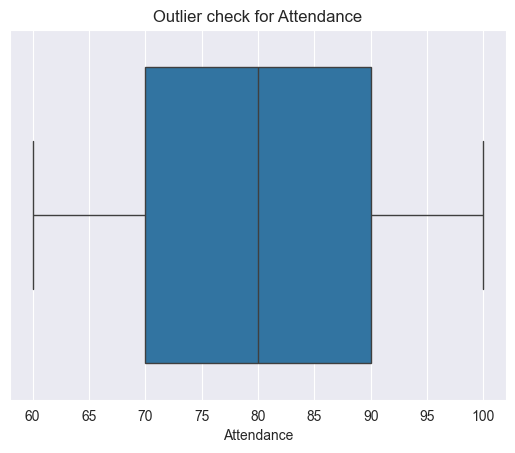

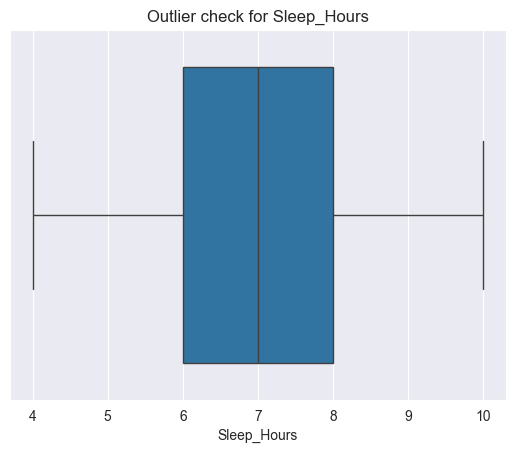

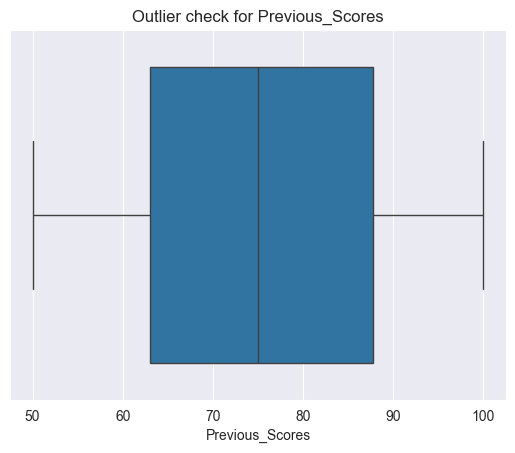

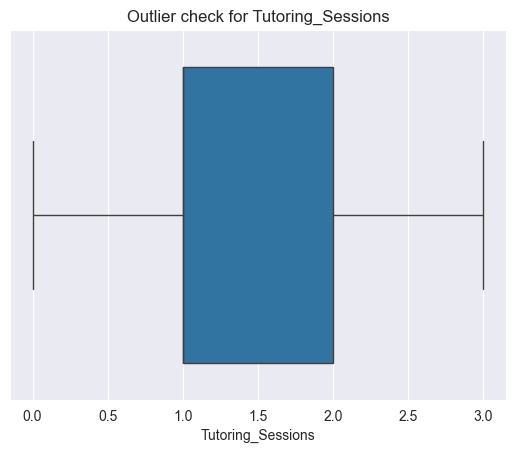

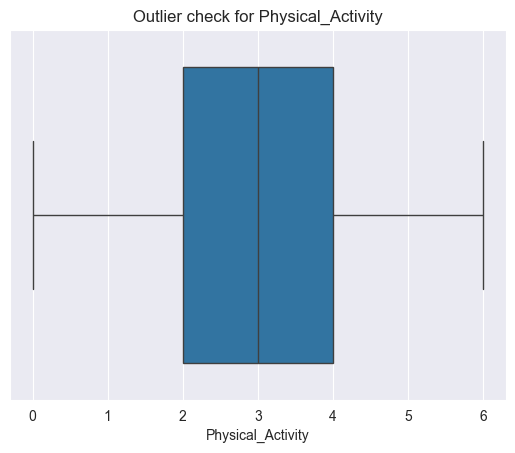

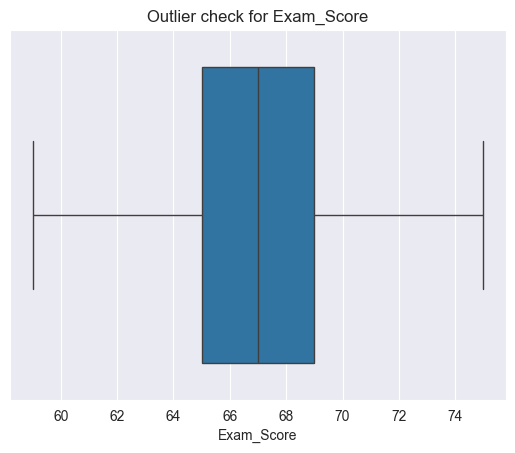

In [117]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Outlier check for {col}")
    plt.show()
    

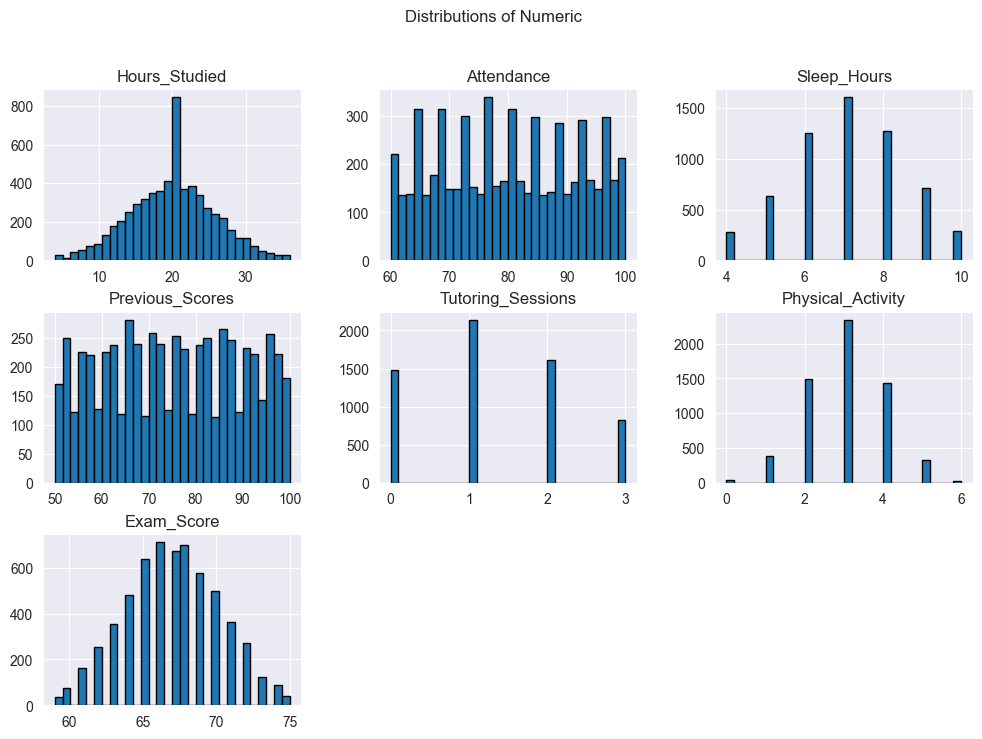

In [118]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
data[numeric_cols].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numeric")
plt.show()

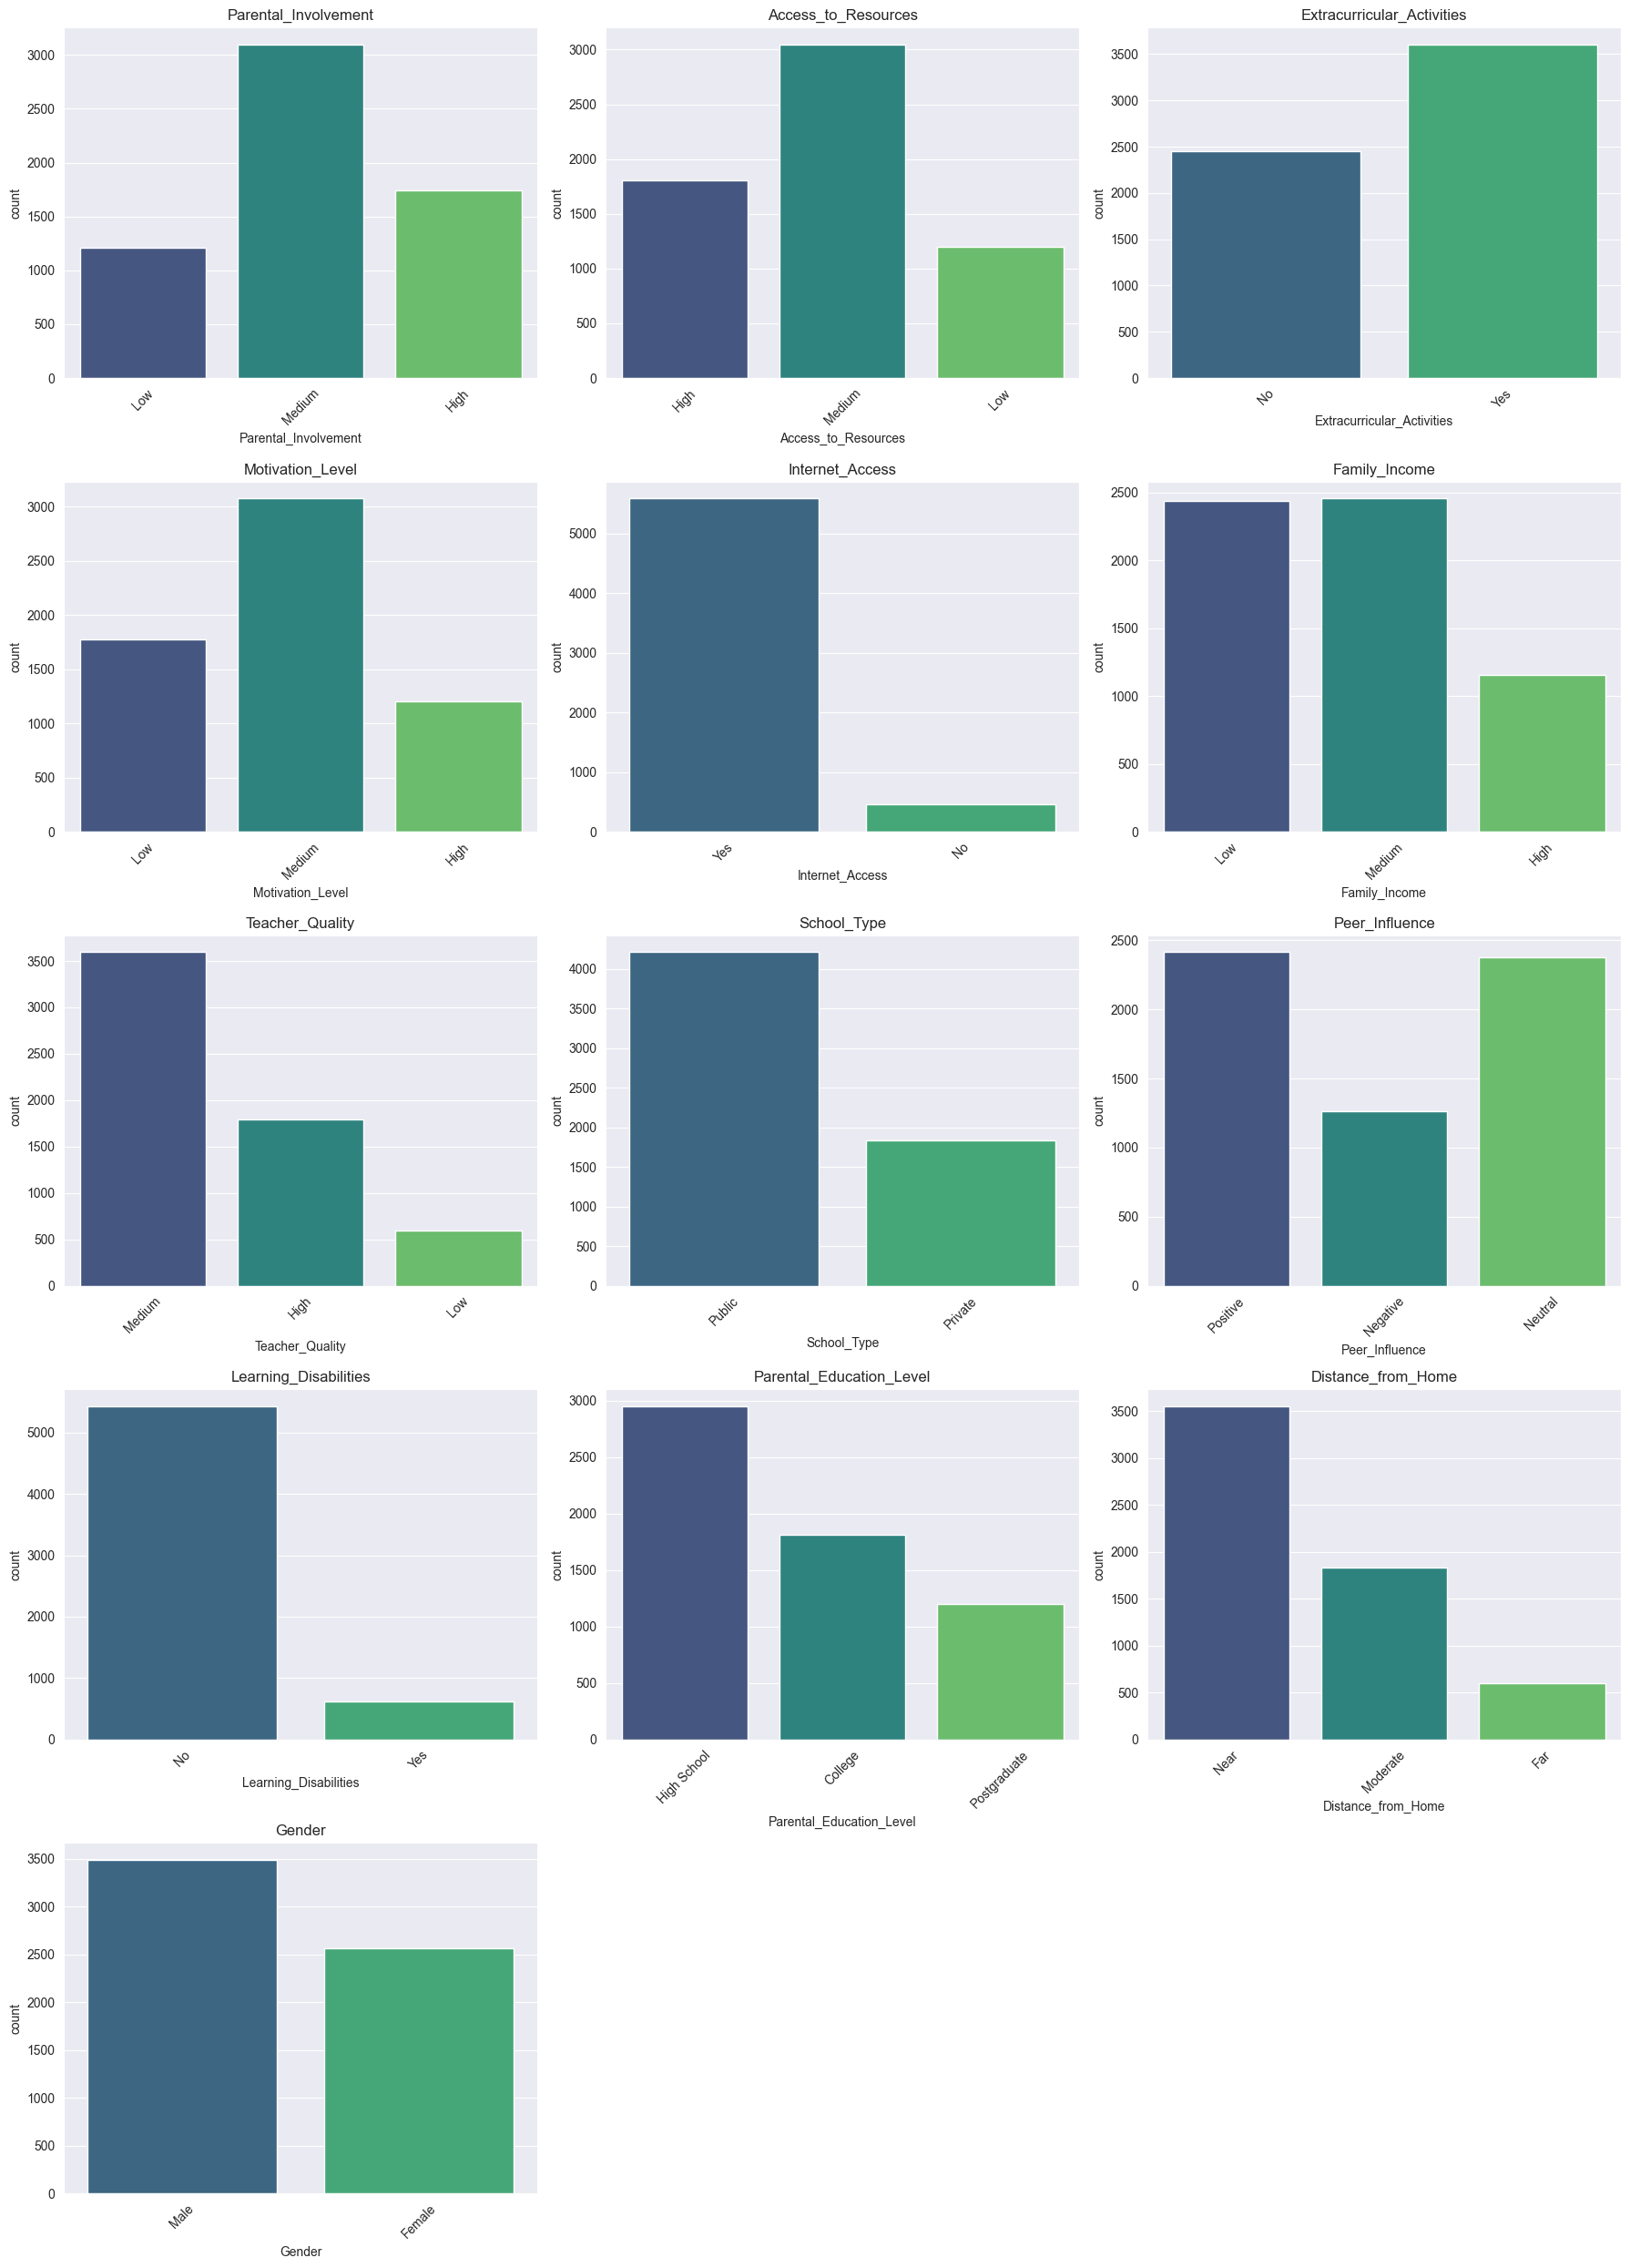

In [119]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    f"\n--- {col} ---"
    data[col].value_counts()
n = len(categorical_cols)
rows = (n // 3) + 1   
plt.figure(figsize=(18, 5*rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=data[col], hue=data[col], palette="viridis", legend=False)
    plt.title(f"{col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

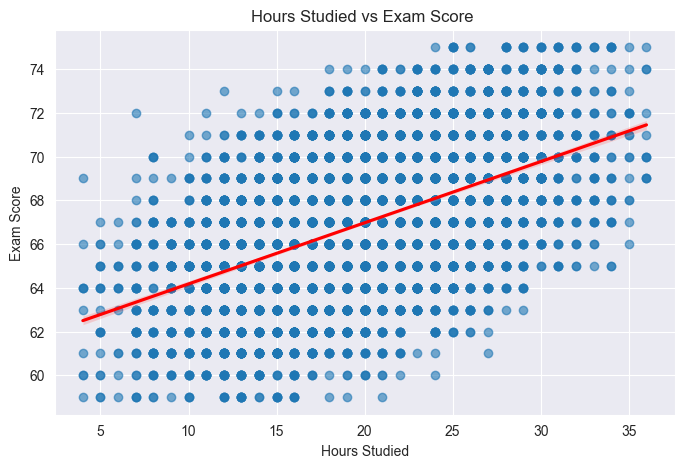

In [120]:
sorted_data = data.sort_values(by="Hours_Studied")
plt.figure(figsize=(8,5))
sns.regplot(x="Hours_Studied", y="Exam_Score", data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Hours Studied vs Exam Score ")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

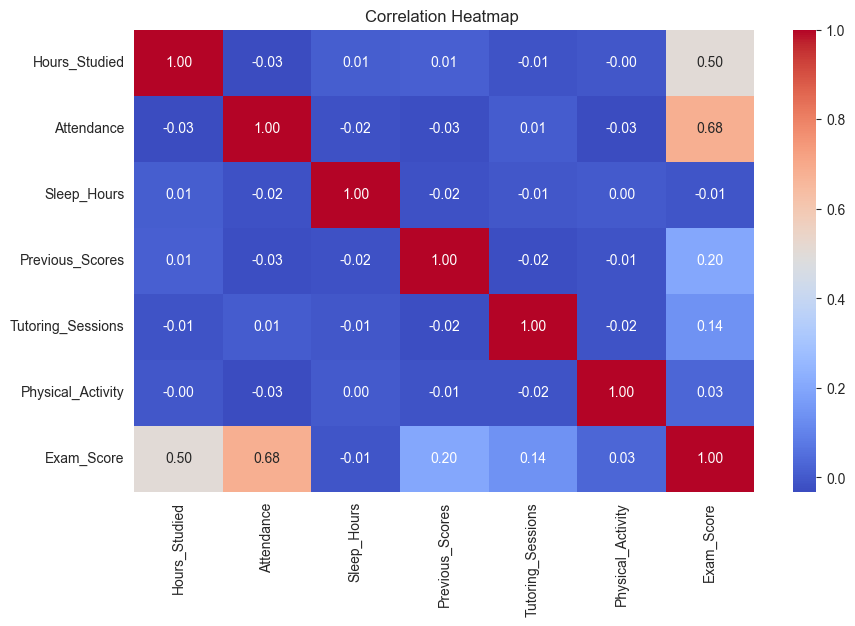

In [121]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap ")
plt.show()

In [122]:
def label_encode_dataframe(df):
    df_encoded = df.copy()
    le = LabelEncoder()

    for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded
data_encoded = label_encode_dataframe(data)
target_col = "Exam_Score"
X = data_encoded.drop(columns=[target_col])
y = data_encoded[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [123]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [124]:
# Predictions
y_pred = lr.predict(X_test)

In [125]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("✅ Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

✅ Model Evaluation Results:
Mean Squared Error (MSE): 1.28
Mean Absolute Error (MAE): 0.91
R² Score: 0.87


In [126]:
# Compare actual vs predicted
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

      Actual  Predicted
6003      68  66.763811
652       70  69.203131
2909      65  66.677456
3375      67  65.674985
3143      61  61.567189


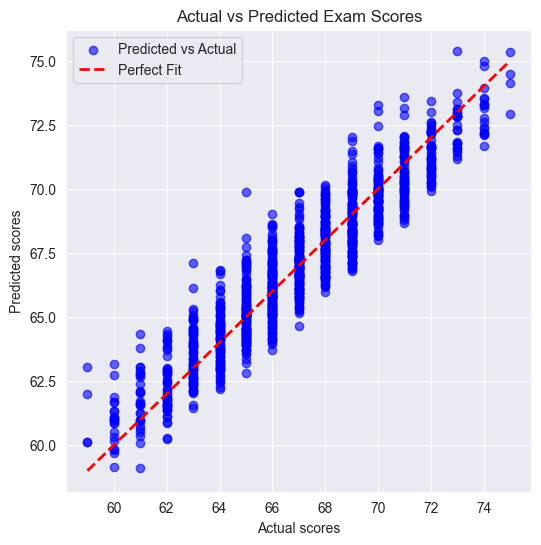

In [127]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual scores")
plt.ylabel("Predicted scores")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()

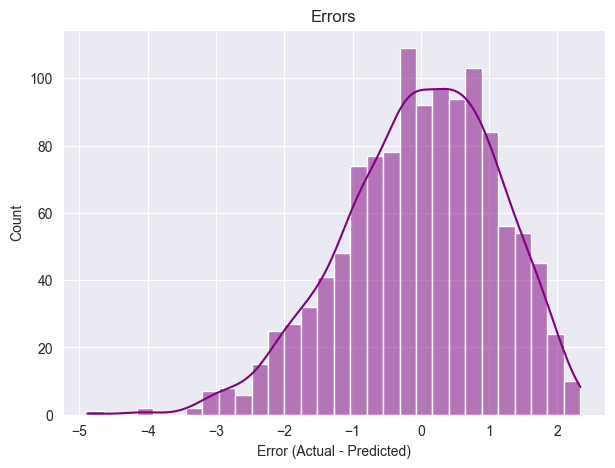

In [128]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.show()